In [9]:
from my_ai_utils import *

import keras
keras.__version__
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences 
import matplotlib.pyplot as plt

In [10]:
max_features = 10000 # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(input_train.shape, 'train sequences')
print(input_test.shape, 'test sequences')
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('y shape:', y_train.shape)
print(y_train[0])


Loading data...
(25000,) train sequences
(25000,) test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
y shape: (25000,)
1


In [11]:
model1 = models.Sequential()
model1.add(layers.Embedding(max_features, 8))
model1.add(layers.LSTM(4, activation="tanh"))
model1.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           80000     
                                                                 
 lstm_1 (LSTM)               (None, 4)                 208       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 80,213
Trainable params: 80,213
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2 = Sequential(usage=Usage.logisticRegression)
model2.add_layer(Embedding(input_dim=max_features, output_dim=8, seq_length=maxlen))
model2.add_layer(LSTM(in_features=8, hidden_features=4))
model2.add_layer(Dense(in_features=4, out_features=1, activation="sigmoid"))

# learning_rate schedulers
# lr = Warmup(target_lr=0.1, warm_steps=20)
lr = CosineDecay(initial_lr=0.05, alpha=0.001, warmup=False, warmup_steps=100, hold_steps=200)
# lr = ExponentialDecay(initial_lr=0.01, decay_rate=0.2, warmup=True, warmup_steps=5, hold_steps=5)

model2.compile(loss_fn=Loss("binary_cross_entropy"), optimizer=RMSprop(lr=lr))
model2.summary()

Model : 'sequential' 
________________________________________________________

Layer (type)			 Params #

embedding (Embedding)			80000

lstm (LSTM)			208

dense (Dense)			5


Total params: 80213




In [13]:
history = model1.fit(input_train, y_train, epochs=5, batch_size=128, validation_data=(input_train, y_train))

Epoch 1/5
196/196 [==============================] - 32s 151ms/step - loss: 0.5083 - acc: 0.7574 - val_loss: 0.4258 - val_acc: 0.8211
Epoch 2/5
196/196 [==============================] - 30s 154ms/step - loss: 0.3717 - acc: 0.8469 - val_loss: 0.2804 - val_acc: 0.8970
Epoch 3/5
196/196 [==============================] - 31s 160ms/step - loss: 0.3181 - acc: 0.8729 - val_loss: 0.3057 - val_acc: 0.8786
Epoch 4/5
196/196 [==============================] - 31s 158ms/step - loss: 0.2749 - acc: 0.8928 - val_loss: 0.2118 - val_acc: 0.9236
Epoch 5/5
196/196 [==============================] - 28s 144ms/step - loss: 0.2352 - acc: 0.9107 - val_loss: 0.2500 - val_acc: 0.8994


In [14]:
history = model2.train(input_train, y_train, nepochs=5, batch_size=128, validation_data=(input_train, y_train))

Training data dimensions:  (25000, 500)
Epoch 1/5


100%|██████████| 196/196 [01:02<00:00,  3.12it/s, train_loss=0.481, val_loss=0.416, accuracy=0.833]


Epoch 2/5


100%|██████████| 196/196 [01:02<00:00,  3.13it/s, train_loss=0.4, val_loss=0.411, accuracy=0.812]


Epoch 3/5


100%|██████████| 196/196 [01:02<00:00,  3.16it/s, train_loss=0.486, val_loss=0.336, accuracy=0.859]


Epoch 4/5


100%|██████████| 196/196 [01:06<00:00,  2.94it/s, train_loss=0.215, val_loss=0.224, accuracy=0.913]


Epoch 5/5


100%|██████████| 196/196 [01:02<00:00,  3.11it/s, train_loss=0.145, val_loss=0.21, accuracy=0.918]


 accuracy: 0.84044  


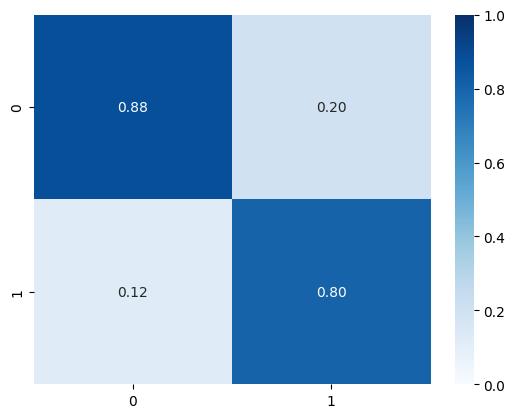

In [15]:
eval_metrics = model2.evaluate(input_test, y_test)

782/782 [==============================] - 22s 28ms/step
 accuracy: 0.83836  


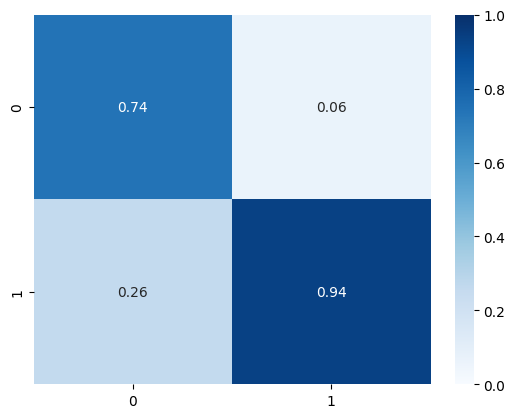

In [16]:
y_pred = model1.predict(input_test)
Accuracy(y_pred, y_test)
ConfusionMatrix(y_pred, y_test, classes=[0, 1], usage=Usage.logisticRegression)